In [1]:
#importing the neccessary libraries
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
# removing unneccessary columns
df = df.drop(columns= {"Unnamed: 2",'Unnamed: 3','Unnamed: 4'}, axis= 1)

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.rename(columns={'v1':'output','v2':'sms/email'},inplace=True)

In [7]:
df

,output,sms/email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
num_duplicates = df.duplicated().sum()
num_duplicates, df.shape

(403, (5572, 2))

In [9]:
#droping 403 duplicate values
df = df.drop_duplicates(keep='first')

In [10]:
df

,output,sms/email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


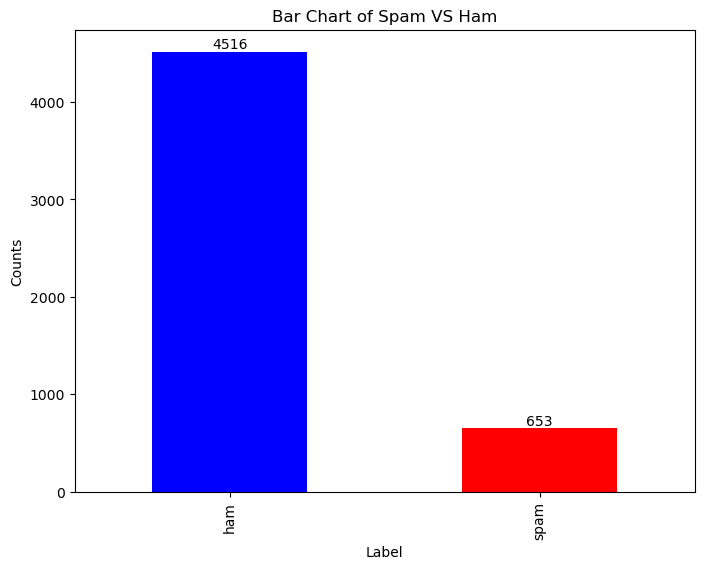

In [11]:
import matplotlib.pyplot as plt

value_counts = df['output'].value_counts()
value_counts

plt.figure(figsize=(8,6))
ax = value_counts.plot(kind='bar',color = ['blue','red'])
plt.title('Bar Chart of Spam VS Ham')
plt.xlabel('Label')
plt.ylabel('Counts')

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

## Preprocessing & Applying some NLP techniques

In [12]:
#mapping; converting spam to 0 & ham to 1
df.loc[:,'output'] = df['output'].map({'spam':0, 'ham':1})
df['output']

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: output, Length: 5169, dtype: object

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
#get no. of character in each sms/email
df['no_of_chars'] = df['sms/email'].apply(len)
df

C:\Users\hp\AppData\Local\Temp\ipykernel_13072\2383306956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_of_chars'] = df['sms/email'].apply(len)


,output,sms/email,no_of_chars
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,161
5568,1,Will Ì_ b going to esplanade fr home?,37
5569,1,"Pity, * was in mood for that. So...any other s...",57
5570,1,The guy did some bitching but I acted like i'd...,125


In [15]:
#tokenze the sms/email; get these words individually and count these words

tokenized_Sms = []
len_of_sms = []

for sms in df['sms/email']:
    tokens = nltk.word_tokenize(sms)
    tokenized_Sms.append(tokens)
    len_of_sms.append(len(tokens))
    
df.loc[:, 'tokenized_sms'] = tokenized_Sms
df.loc[:, 'length of sms'] = len_of_sms
#df['tokenized_sms'] = tokenized_Sms
#df['length of sms'] = len_of_sms

C:\Users\hp\AppData\Local\Temp\ipykernel_13072\1871242119.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'tokenized_sms'] = tokenized_Sms
C:\Users\hp\AppData\Local\Temp\ipykernel_13072\1871242119.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'length of sms'] = len_of_sms


In [16]:
df

,output,sms/email,no_of_chars,tokenized_sms,length of sms
0,1,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24
1,1,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37
3,1,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13
4,1,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15
...,...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,161,"[This, is, the, 2nd, time, we, have, tried, 2,...",35
5568,1,Will Ì_ b going to esplanade fr home?,37,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]",9
5569,1,"Pity, * was in mood for that. So...any other s...",57,"[Pity, ,, *, was, in, mood, for, that, ., So, ...",15
5570,1,The guy did some bitching but I acted like i'd...,125,"[The, guy, did, some, bitching, but, I, acted,...",27


In [17]:
#finding out how many sentences are there is each sms/email
# this process is called Sent_tokenizing
from nltk.tokenize import sent_tokenize

no_of_sentences = []

for sms in df['sms/email']:
    sentences = sent_tokenize(sms)
    no_of_sentences.append(len(sentences))
    
df['num_of_sentences'] = no_of_sentences
df

C:\Users\hp\AppData\Local\Temp\ipykernel_13072\3144200599.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_sentences'] = no_of_sentences


,output,sms/email,no_of_chars,tokenized_sms,length of sms,num_of_sentences
0,1,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,2
1,1,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,2
3,1,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,1
4,1,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,1
...,...,...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,161,"[This, is, the, 2nd, time, we, have, tried, 2,...",35,4
5568,1,Will Ì_ b going to esplanade fr home?,37,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]",9,1
5569,1,"Pity, * was in mood for that. So...any other s...",57,"[Pity, ,, *, was, in, mood, for, that, ., So, ...",15,2
5570,1,The guy did some bitching but I acted like i'd...,125,"[The, guy, did, some, bitching, but, I, acted,...",27,1


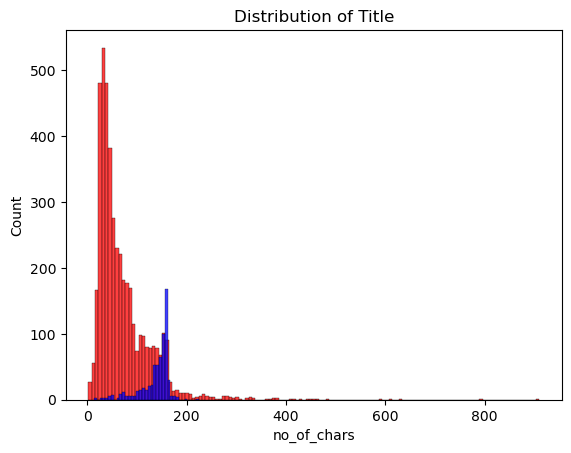

In [18]:
#plotting the histogram for spam and ham messages
import seaborn as sns

sns.histplot(df[df['output']==1]['no_of_chars'],color='red')
sns.histplot(df[df['output']==0]['no_of_chars'],color='blue')
plt.title('Distribution of Title')
plt.show()

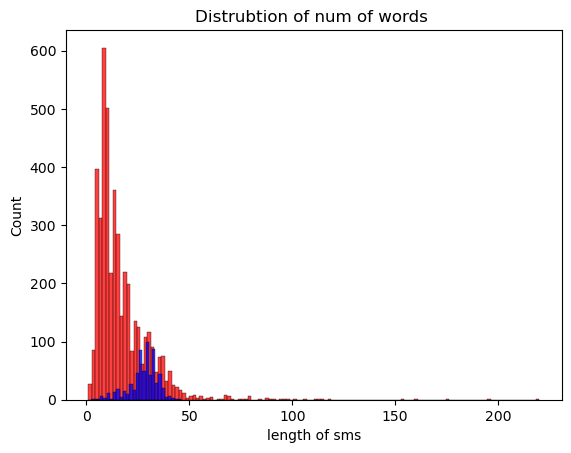

In [19]:
sns.histplot(df[df['output']==1]['length of sms'],color='red')
sns.histplot(df[df['output']==0]['length of sms'],color='blue')
plt.title('Distrubtion of num of words ')
plt.show()

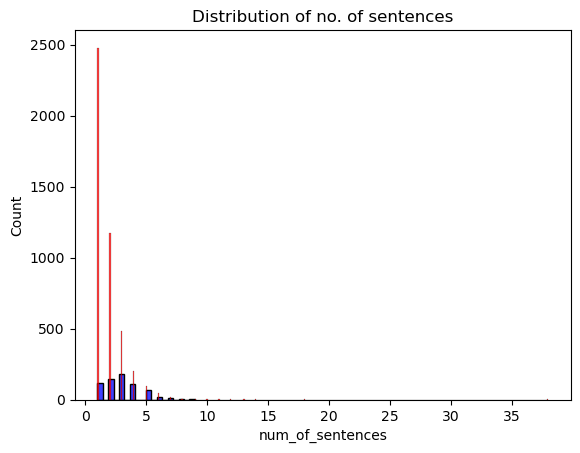

In [20]:
sns.histplot(df[df['output']==0]['num_of_sentences'],color='blue')
sns.histplot(df[df['output']==1]['num_of_sentences'],color='red')
plt.title('Distribution of no. of sentences')
plt.show()

In [21]:
df2=df[['output','no_of_chars','length of sms','num_of_sentences']]
df2

,output,no_of_chars,length of sms,num_of_sentences
0,1,111,24,2
1,1,29,8,2
2,0,155,37,2
3,1,49,13,1
4,1,61,15,1
...,...,...,...,...
5567,0,161,35,4
5568,1,37,9,1
5569,1,57,15,2
5570,1,125,27,1


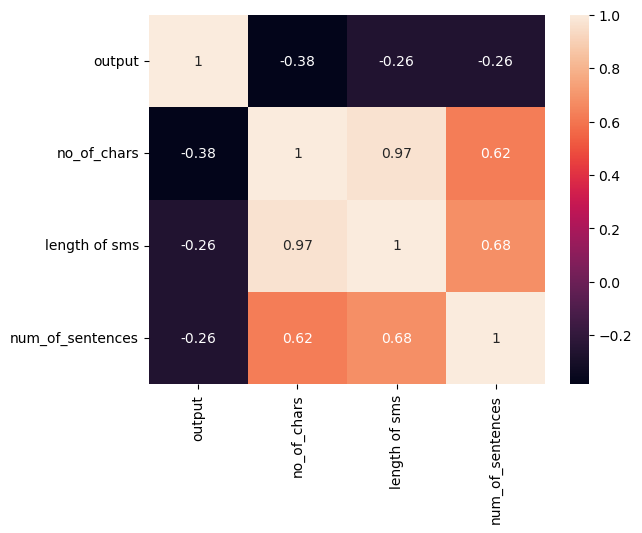

In [22]:
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [23]:
#string.punctuation constant contains a string of all punctuation characters
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
#posterstemmer is a algorithm for stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('playing')

'play'

In [25]:
# stop words that have little meaning in a sentences
from nltk.corpus import stopwords
# Download the stopwords corpus
nltk.download('stopwords')
stopwords.words('English')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
def process_text(txt):
    txt = txt.lower()
    txt = nltk.word_tokenize(txt)
    y = []
    for i in txt:
        if i.isalnum():
            y.append(i)
    txt = y[:]
    y.clear()
    #removing stop words & punctuation
    for i in txt:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    txt = y[:]
    y.clear()
    for i in txt:
       y.append(ps.stem(i))
    return " ".join(y)
    

In [31]:
txt = 'i am running xd%'
process_text(txt)

'run xd'

In [32]:
#creating a new column which have all the transformed text 
df['processed_text'] = df['sms/email'].apply(process_text)

C:\Users\hp\AppData\Local\Temp\ipykernel_13072\2070161608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_text'] = df['sms/email'].apply(process_text)


In [42]:
#WordCloud is used for generating visual representations of word frequency in a text corpus
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,min_word_length=4,background_color='black')

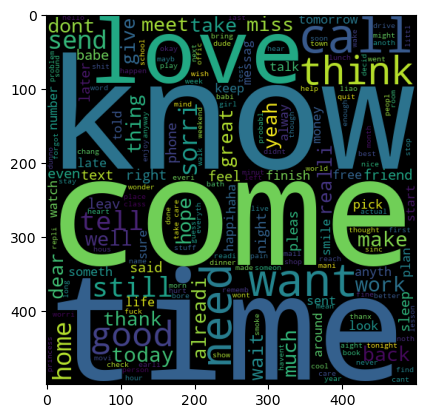

In [45]:
# get the most frequently ham words
ham_words=wc.generate(df[df['output']==1]['processed_text'].str.cat(sep=" "))
plt.imshow(ham_words)
plt.show()

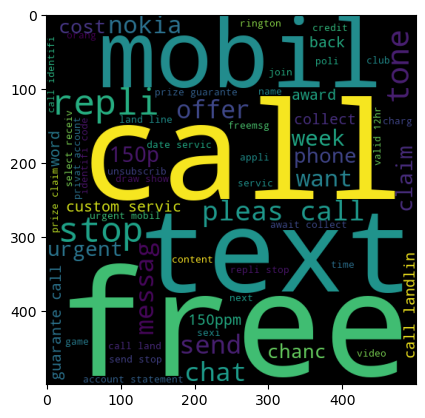

In [47]:
spam_words = wc.generate(df[df['output']==0]['processed_text'].str.cat(sep=' '))
plt.imshow(spam_words)
plt.show()

## Modelling Time
### __Count Vectorizer:__ to convert a collection of text documents into a matrix of token
### __TF-IDF:__  for converting a collection of text documents to a matrix of TF-IDF features with a limit of features.

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [50]:
#feature selection
X = tfidf.fit_transform(df['processed_text']).toarray()
y=df['output'].values

In [51]:
from sklearn.model_selection import train_test_split 

#splitting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1,stratify=y,shuffle=True)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4135, 3000)
Shape of y_train: (4135,)
Shape of X_test: (1034, 3000)
Shape of y_test: (1034,)


In [52]:
from sklearn.naive_bayes import GaussianNB ,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report

0.8588007736943907
[[107  24]
 [122 781]]
              precision    recall  f1-score   support

           0       0.47      0.82      0.59       131
           1       0.97      0.86      0.91       903

    accuracy                           0.86      1034
   macro avg       0.72      0.84      0.75      1034
weighted avg       0.91      0.86      0.87      1034



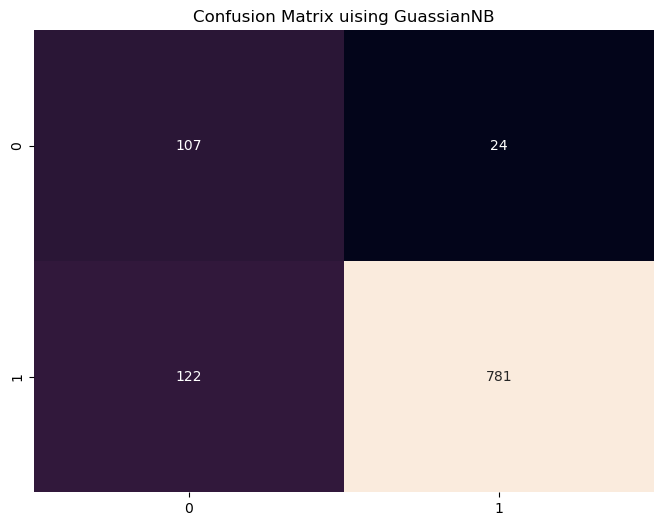

In [56]:
gnb = GaussianNB()
# Ensure the labels are in the correct format
y_train = y_train.astype(int)
y_test = y_test.astype(int)
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)

print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(classification_report(y_test,y_pred_gnb))

cm = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(8,6))

sns.heatmap(cm, annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix uising GuassianNB')
plt.show()

0.9816247582205029
[[114  17]
 [  2 901]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       131
           1       0.98      1.00      0.99       903

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034



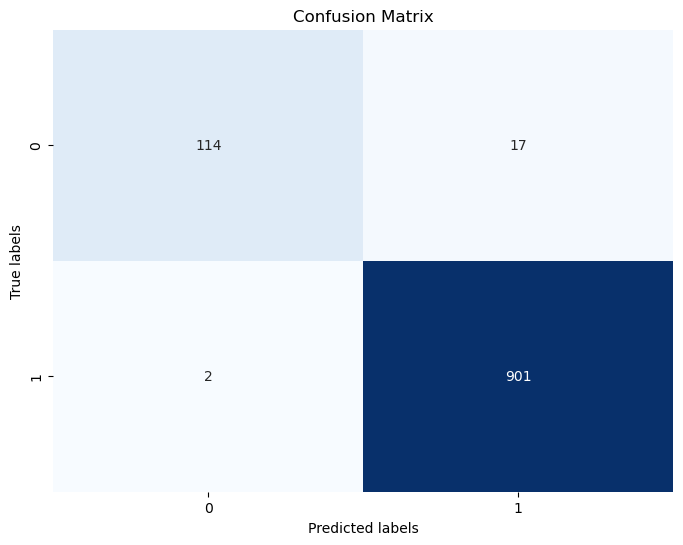

In [57]:
bnb=BernoulliNB()


bnb.fit(X_train,y_train)
y_pred_bnb=bnb.predict(X_test)

print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(classification_report(y_test,y_pred_bnb))

cm = confusion_matrix(y_test, y_pred_bnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## BernoulliNB is Better, So we would be deploying that

In [59]:
#deploying the model using pickle
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))